## Preprocessing images for FaceNet model

Note - this dataset is comprised of 10 woman each with a series of relatively closely cropped images of different facial expressions. Within this notebook I will be doing some simple data augmentation (horizontal reflection) to double the size of the dataset and resizing the images.

Dataset Acknowledgment:
Michael J. Lyons, Shigeru Akemastu, Miyuki Kamachi, Jiro Gyoba.
Coding Facial Expressions with Gabor Wavelets, 3rd IEEE International Conference on Automatic Face and Gesture Recognition, pp. 200-205 (1998).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import latex
import os
import cv2
from skimage.transform import resize
from sklearn.utils import shuffle
from PIL import Image
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
Resizes images to (220,220) and performs horizontal reflection, returning original and augmented images
"""
def data_aug(path,f_name):
    img = cv2.imread(path+f_name)
    img1 = cv2.resize(img, (220,220), interpolation = cv2.INTER_AREA)
    img2 = np.flip(img1, axis=1)
    return img1,img2

In [3]:
"""
Iterates through images, saving images and their respective subject name
"""
def get_all_data(path="../../data/facenet/jaffe_facedata/"):
    name_list = [] 
    image_list = [] # subject name for given image
    for file in os.listdir(path): # iterating through images
        if ".tiff" in file: # image
            name = file.split(".")[0]
            img1,img2 = data_aug(path,file)
            image_list.append(img1)
            name_list.append(name)
            image_list.append(img2)
            name_list.append(name)

    return image_list,name_list

In [4]:
image_list,name_list = get_all_data()

In [13]:
images = np.array(image_list)
names = np.array(name_list)
names.shape = (426,)

In [14]:
print(images.shape)
print(names.shape)

(426, 220, 220, 3)
(426,)


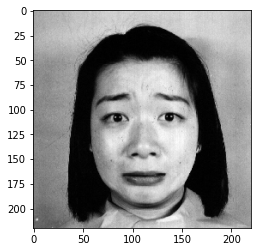

person: YM


In [15]:
# Normal image example
plt.imshow(images[202])
plt.show()
print("person:", names[202])

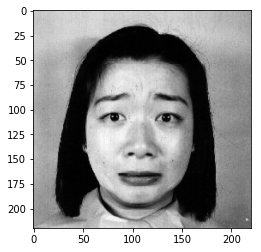

person: YM


In [16]:
# Horizontally flipped image example
plt.imshow(images[203])
plt.show()
print("person:", names[203])

In [17]:
# Shuffling data
images = shuffle(images, random_state=1) 
names = shuffle(names, random_state=1)

In [19]:
# Saving the names and the images
np.save("../../data/facenet/images.npy",images)
np.save("../../data/facenet/names.npy",names)